In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import preprocessing

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

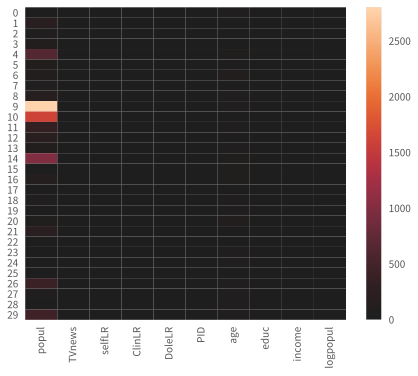

In [6]:
df = df_X
sns.heatmap(df.head(30), center=0)
plt.show()

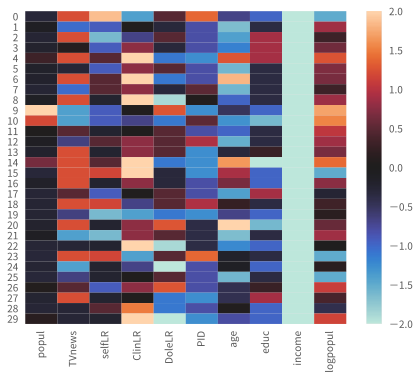

In [7]:
df = df_X
X = X_raw

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X, index=df.index, columns=df.columns)
sns.heatmap(df.head(30), center=0, vmin=-2, vmax=2)

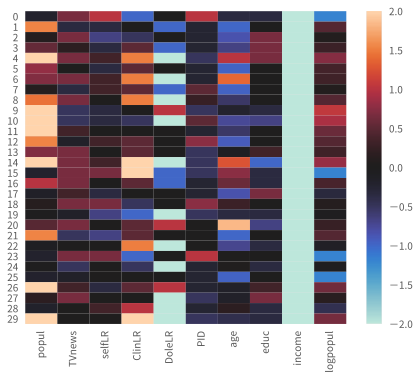

In [8]:
df = df_X
X = X_raw

scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X, index=df.index, columns=df.columns)
sns.heatmap(df.head(30), center=0, vmin=-2, vmax=2)

Observe the color of the _popul_.

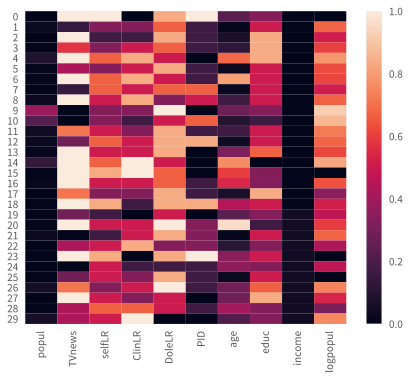

In [9]:
df = df_X
X = X_raw

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X, index=df.index, columns=df.columns)
sns.heatmap(df.head(30))

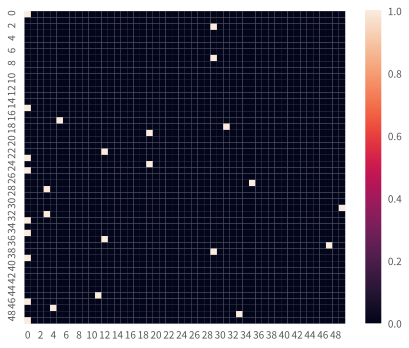

In [10]:
X = X_raw

enc = preprocessing.OneHotEncoder()
enc.fit(X)

X = enc.transform(X)
sns.heatmap(X[:50, :50].todense())

In [11]:
from sklearn import feature_selection

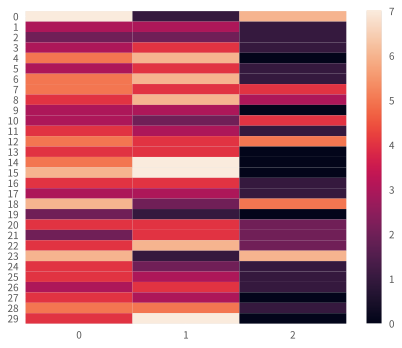

In [12]:
X = X_raw
y = y_raw

selector = feature_selection.SelectKBest(feature_selection.f_classif,
                                         k=3)
X = selector.fit_transform(X, y)

sns.heatmap(X[:30])

In [13]:
from sklearn import ensemble

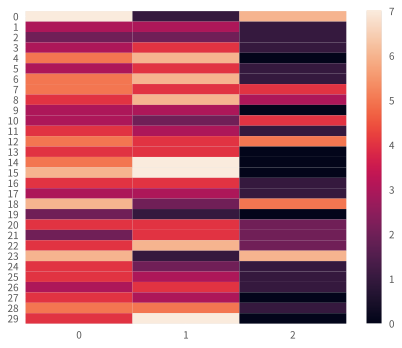

In [14]:
X = X_raw
y = y_raw

selector = feature_selection.SelectFromModel(ensemble.ExtraTreesClassifier())
X = selector.fit_transform(X, y)

sns.heatmap(X[:30])